ACCURACY CALCULATION FOR MACHINE-LEARNINGS COMPARISON

> Indented block



USE CASE : HUMAN RESOURCE DATA

In [45]:
from google.colab import files
file = files.upload()

Saving 31. HR_comma_sep(1).csv to 31. HR_comma_sep(1) (1).csv


In [2]:
import pandas as pd

In [46]:
df = pd.read_csv('31. HR_comma_sep(1).csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


1. ONE HOT ENCODER




In [47]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


1.1 MANIPULATE CATEGORICAL VALUE TO NUMERIC VALUE

---Because to makes object data type shift to numerical type. It's required for making array 



In [48]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [49]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

1.2 IMPORT SOME RELATED LIBRARIES and DEFINE VALUES TO BE MANUPULATED

In [50]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

#Values from salary and sales column are maniputed to be numeric type
#enc_ode : encode for ordinal
#enc_ohe : encode for one hot encoder

enc_ode = OrdinalEncoder(categories=[['low','medium','high']])

enc_ohe = OneHotEncoder(categories=[['sales', 'accounting', 'hr', 
                                     'technical', 'support', 'management',
                                     'IT', 'product_mng', 'marketing', 'RandD']],
                        handle_unknown='ignore', sparse = False)

# 1.3 TRANFORMS THE COLUMNS VALUES TO BE ARRAY

In [51]:
import numpy as np

#Labelling encoder for ordinal data
y = np.array(df['salary']).reshape(-1,1)
enc_ode.fit(y)
df['salary'] = enc_ode.transform(y)

In [52]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,1.0
2,0.11,0.88,7,272,4,0,1,0,sales,1.0
3,0.72,0.87,5,223,5,0,1,0,sales,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,0.0


In [53]:
#Now you can the different at salary column, they became numerical type

In [54]:
#Labelling for One Hot Encoder
y = np.array(df['sales']).reshape(-1,1)
enc_ohe.fit(y)

y1 =  enc_ohe.transform(y)
y1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#At sales column, categorical type has been transfomed into numerical type

1.4 REMOVE ARRAY INTO DATABASE AND ADDING NEW COLUMNS

In [55]:
#array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
#       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)
df[['sales_sls', #sales 
      'sales_act', #acounting 
      'sales_hr', #HR
      'sales_tec', #technical 
      'sales_sup', #suppport 
      'sales_mng', #management
      'sales_it', #IT
      'sales_pro',#product
     'sales_mrk',#marketing
      'sales_rnd']] = y1
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales_sls,sales_act,sales_hr,sales_tec,sales_sup,sales_mng,sales_it,sales_pro,sales_mrk,sales_rnd
0,0.38,0.53,2,157,3,0,1,0,sales,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,sales,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,sales,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
#Checking all the columns
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'sales_sls', 'sales_act',
       'sales_hr', 'sales_tec', 'sales_sup', 'sales_mng', 'sales_it',
       'sales_pro', 'sales_mrk', 'sales_rnd'],
      dtype='object')

1.5 MAKE DATA CLONE

Using Data clone just to make sure, if there is any mistake, it do not make any change to the original data

In [57]:
df_clone = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'sales_sls', 'sales_act',
       'sales_hr', 'sales_tec', 'sales_sup', 'sales_mng', 'sales_it',
       'sales_pro', 'sales_mrk', 'sales_rnd']].copy()
df_clone.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales_sls,sales_act,sales_hr,sales_tec,sales_sup,sales_mng,sales_it,sales_pro,sales_mrk,sales_rnd
0,0.38,0.53,2,157,3,0,1,0,sales,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,sales,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,sales,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2. DEFINE TARGET and PREDICTOR

2.1 TARGET


In [58]:
df_x = df_clone[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'sales_sls', 'sales_act',
       'sales_hr', 'sales_tec', 'sales_sup', 'sales_mng', 'sales_it',
       'sales_pro', 'sales_mrk', 'sales_rnd']].copy()
df_x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_sls,sales_act,sales_hr,sales_tec,sales_sup,sales_mng,sales_it,sales_pro,sales_mrk,sales_rnd
0,0.38,0.53,2,157,3,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.80,0.86,5,262,6,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.11,0.88,7,272,4,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.72,0.87,5,223,5,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.37,0.52,2,159,3,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2.2 PREDICTOR

In [59]:
df_y = df_clone['left']
#It use to predict which one empoyer who will be left company

df_y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

3. APPLY MACHINE LEARNING

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

3.1 LOGISTIC REGRESSION

In [61]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25, random_state=0)
LR = LogisticRegression(max_iter=2000)
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
predictions = LR.predict(x_test)
print(f'Logistic Regression accuracy score is : {accuracy_score(y_test, predictions)} ')

Logistic Regression accuracy score is : 0.7898666666666667 


In [63]:
#Prediction with probability
pred_prob = LR.predict_proba(x_test)
pred_prob

array([[0.72041324, 0.27958676],
       [0.76605823, 0.23394177],
       [0.96083466, 0.03916534],
       ...,
       [0.71808652, 0.28191348],
       [0.80424776, 0.19575224],
       [0.80824015, 0.19175985]])

in that array it means the percentages of employer left probability. Like 0.72 says a employer would left the company with 72% probability

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [65]:
print(f'Accuration for y_test : {accuracy_score(y_test,predictions)}')
print(f'confussion matrix :\n {confusion_matrix(predictions, y_test)}')
print(f'recall precision : {precision_score(predictions, y_test)}')

Accuration for y_test : 0.7898666666666667
confussion matrix :
 [[2660  567]
 [ 221  302]]
recall precision : 0.3475258918296893


confusion matrix is matrix between prediction with its true value

In [66]:
from collections import Counter

Counter(y_train)

Counter({0: 8547, 1: 2702})

3.1.1 LOGISTIC REGRESSION without SMOTE

In [67]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth = 7)
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
accuracy_score(y_test, predictions)

0.9786666666666667

In [68]:

print(confusion_matrix(y_test, predictions))
print(recall_score(y_test, predictions))
print(precision_score(y_test, predictions))

[[2864   17]
 [  63  806]]
0.9275028768699655
0.9793438639125152


3.1.2 LOGISTIC REGRESSION WITH SMOTE[link text](https://)

In [69]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(sampling_strategy = 0.5, k_neighbors=5, random_state=42)

In [39]:
Counter(y_train)

Counter({0: 8547, 1: 2702})

In [40]:
x_res, y_res = sm.fit_resample(x_train, y_train)
Counter(y_res)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 8547, 1: 4273})

In [70]:
print(confusion_matrix(y_test, predictions))
print(recall_score(y_test, predictions))
print(precision_score(y_test, predictions))

[[2864   17]
 [  63  806]]
0.9275028768699655
0.9793438639125152


3.2 KNN


3.2.1 KNN WITHOUT SMOTE

In [71]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
accuracy_score(y_test, prediction)


0.9397333333333333

With KNN Methode, accuracy reaches 93%

3.2.2 KNN WITH SMOTE

In [74]:
knn.fit(x_res, y_res)
prediction = knn.predict(x_test)
accuracy_score(y_test, predictions)

0.9786666666666667

3.3 DECISION TREEE

In [83]:
clf = DecisionTreeClassifier(random_state = 0, criterion = 'entropy', 
                             max_depth = 4)
clf.fit(x_train, y_train)

prediction = clf.predict(x_test)
accuracy_score(y_test, predictions)

0.9786666666666667

3.3.1 MAKING TREE CHART

In [84]:
from sklearn import tree
import graphviz
import os

os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

x_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'sales_sls', 'sales_act', 'sales_hr',
       'sales_tec', 'sales_sup', 'sales_mng', 'sales_it', 'sales_pro',
       'sales_mrk', 'sales_rnd'],
      dtype='object')

In [78]:
clf = DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 7)
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
accuracy_score(y_test, predictions)

0.9786666666666667

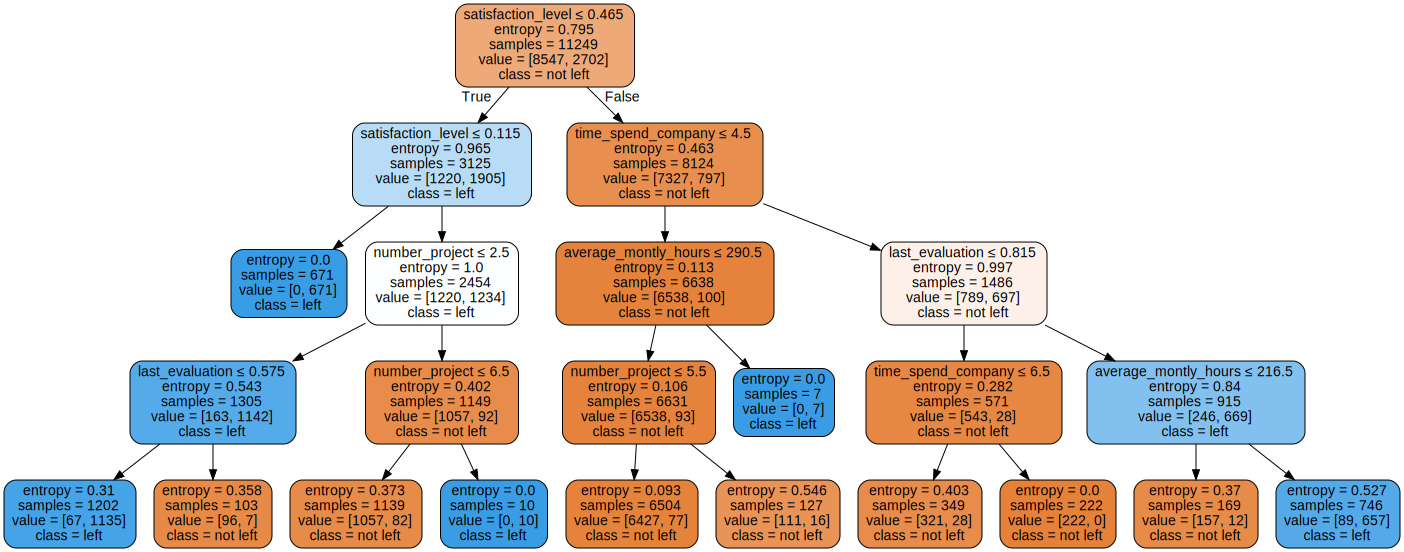

In [88]:
dot_data= tree.export_graphviz(clf, out_file=None,
                              feature_names = x_train.columns,
                              class_names = ['not left', 'left'],
                              filled = True, rounded = True,
                              special_characters=True)

tree_graphic = graphviz.Source(dot_data)
tree_graphic